# 31 Oct 23 - Activity: Signal Deconstruction

We have started to show that we can take waves of any periodicity and add them together to get new signals. But more common is for us to receive a signal and want to know what waves are in it. This is the process of signal deconstruction. We will be using $V(t)$ to describe this signal because pretty much everything is a voltage. But now we introduce the toolkit that can help us do this. 

We can build up this idea by starting with a given $V(t)$ with some base periodicity ($w_0$ or $T_0$), really the longest period or lowest frequency in the signal. We can use a Fourier Series to decompose those signals in terms of harmonics ($n\;\omega_0$) of the base frequency. The model of this decomposition is given by the [infinite series](https://en.wikipedia.org/wiki/Fourier_series#Sine-cosine_form):

$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n\omega_0t) + b_n \sin(n\omega_0t)$

Or

$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos\left(\dfrac{2n\pi}{T_0}t\right) + b_n \sin\left(\dfrac{2n\pi}{T_0}t\right)$

By using the [orthogonal nature](https://en.wikipedia.org/wiki/Orthogonal_functions) of $\sin$ and $\cos$ over one period, we can find the unknown coefficients for a given signal $V(t)$. 

### DC Offset

The first term in the sum is just related to the DC offset, that is the average of the signal over one period. That's because $sin$ and $cos$ don't shift the average (they have a time average of zero, remember?)

$\dfrac{a_0}{2} = \dfrac{1}{T_0}\int_{T_0} f(t) dt$

### Periodic Models

For the periodicity, we use "Fourier's Trick" to determine the value of the coefficients. *Note that you need the signal $V(t)$ to complete this work.* And this isn't a trick, it's a well-established method.

$a_n = \dfrac{2}{T_0}\int_{T_0}V(t)\cos(n\omega_0t)\qquad n\neq0$

$b_n = \dfrac{2}{T_0}\int_{T_0}V(t)\sin(n\omega_0t)\qquad n\neq0$

Given this, our approximate $V(t)$ is given up to the $N$ term is,

$V(t) \approx \dfrac{a_0}{2} + \sum_{n=1}^{N} a_n \cos(n\omega_0t) + b_n \sin(n\omega_0t)$

## Example: The Duty Cycle

There are many signals we could analyze, but one of the common (and more mathematically tractable) ones is the [Duty Cycle](https://en.wikipedia.org/wiki/Duty_cycle). In fact, this signal is in wide use across electrical devices for timed on and off states. Moreover, the behaviors of some neurons and muscle fibers have been shown to approximate duty cycle firing. Synthesizers and electronic music are similar heavy users of [pulse width modulation](https://en.wikipedia.org/wiki/Pulse-width_modulation), which stems from this signal.

The half-wave (square wave) duty cycle is given by,

$V(t) = \begin{cases} 0 & 0 \leq t < \dfrac{T_0}{2} \\ V_0 & \dfrac{T_0}{2} \leq t < T_0 \end{cases}$

**&#9989; Do this** 
1. Identify which integrals you have to do (consider the orthogonality of the functions).
2. Construct the integrals you need to do (over what cycle are you integrating?).
3. Perform the integrals (consider using `sympy`). 
4. Determine the coefficients $a_n$'s and $b_n$'s.
5. Write the function $V(t)$ in terms of the $a_n$'s and $b_n$'s.

## Visualizing the Duty Cycle

It's great that we can produce a solution to this problem,

$$V(t) = \dfrac{V_0}{2} + \sum_{n=1}^{\infty} \dfrac{V_0}{n\pi}\left[\cos(n\pi)-1\right]\sin\left(\dfrac{2n\pi}{T_0}t\right)$$

but what does it look like?

**&#9989; Do this** 
1. Write the relevant functions to compute the coefficients $a_n$'s and $b_n$'s.
2. Write the relevant functions to compute the $V(t)$.
3. Plot the $V(t)$ along with the square wave (look into the `scipy.signal.square` function).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

After simplifying the integrals, we obtain the following expressions for $a_n$ and $b_n$:

$$a_n = 0$$

$$b_n = \frac{-2 V_0}{n \pi}$$ 

Now, we can write the function $V(t)$ in terms of the coefficients $a_n$ and $b_n$:

$$V(t) = \dfrac{V_0}{2} + \sum_{n=1}^{\infty} \dfrac{2V_0}{n\pi}\sin\left(\dfrac{2n\pi}{T_0}t\right)$$
$$V(approx) = \frac{V_0}{2} + \sum_{n=1}^{\infty} b_n \sin \left(\frac{2 \pi n}{T_o}t \right)$$

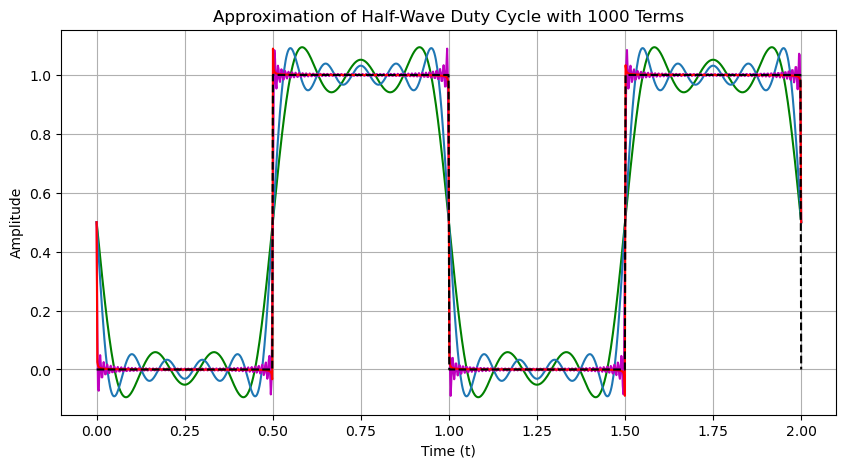

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

T0 = 1.0  # Period of the square wave
V0 = 1.0  # Amplitude of the square wave

# Define the function V(t)
def V(t, N):
    vt = V0 / 2
    for n in range(1, N+1):
        bn = -(V0 - (-1)**n)  / (np.pi * n)
        vt += bn * np.sin(2 * np.pi * n * t / T0)
    return vt

# Generate time values
t = np.linspace(0, 2 * T0, 1000)

# Create a square wave using scipy.signal
square_wave = - ( V0/2 * sig.square(2 * np.pi / T0 * t)) + V0/2

# Plot V(t) and the square wave
plt.figure(figsize=(10, 5))
N = 5  # Number of terms in the series
plt.plot(t, V(t, N), label='V(t) (Approximated)', color = 'g')
N = 10  # Number of terms in the series
plt.plot(t, V(t, N), label='V(t) (Approximated)')
N = 100  # Number of terms in the series
plt.plot(t, V(t, N), label='V(t) (Approximated)', color = 'm')
N = 1000  # Number of terms in the series
plt.plot(t, V(t, N), label='V(t) (Approximated)', color = 'r')

plt.plot(t, square_wave, label='Square Wave (Original)', linestyle='--', color='k')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
#plt.legend()
plt.title(f'Approximation of Half-Wave Duty Cycle with {N} Terms')
plt.grid(True)
plt.show()


## Complex Numbers

One the most useful approaches to representing periodic signals is to use complex numbers. This is because the [Euler's Formula](https://en.wikipedia.org/wiki/Euler%27s_formula) allows us to represent the trigonometric functions as complex exponentials. Euler's formula is given by,

$e^{i\theta} = \cos(\theta) + i\sin(\theta)$

where $i$ is the imaginary number. But what are the properties of [complex numbers](https://en.wikipedia.org/wiki/Complex_number)? There are a larger class of numbers than the reals, and they have interesting properties. The generic form of a complex number is given by,

$$z = a + ib$$

where $a$ and $b$ are real numbers and $i$ is the square root of negative one. We can also write this in terms of the magnitude and phase,

$$z = r e^{i\theta}$$

where $r$ is the magnitude and $\theta$ is the phase and both are real numbers. These two representations are compatible if we think of a complex number represented in the complex plane where the reals appears on the $x$ and the imaginaries on the $y$.

![Complex Plane](https://upload.wikimedia.org/wikipedia/commons/d/d6/Argandgaussplane.png)

The basic properties of complex numbers are below for two numbers $z_1 = a_1 + ib_1$ and $z_2 = a_2 + ib_2$:

* Addition: $z_1 + z_2 = (a_1 + a_2) + i(b_1 + b_2)$
* Subtraction: $z_1 - z_2 = (a_1 - a_2) + i(b_1 - b_2)$
* Multiplication: $z_1 z_2 = (a_1 a_2 - b_1 b_2) + i(a_1 b_2 + a_2 b_1)$
* Division: $\dfrac{z_1}{z_2} = \dfrac{a_1 a_2 + b_1 b_2}{a_2^2 + b_2^2} + i\dfrac{a_2 b_1 - a_1 b_2}{a_2^2 + b_2^2}$

Some of these operations are simpler in the polar form. For example, multiplication is just the product of the magnitudes and the sum of the phases. Division is the ratio of the magnitudes and the difference of the phases. For two complex numbers $z_1 = r_1 e^{i\theta_1}$ and $z_2 = r_2 e^{i\theta_2}$:

* Multiplication: $z_1 z_2 = r_1 r_2 e^{i(\theta_1 + \theta_2)}$
* Division: $\dfrac{z_1}{z_2} = \dfrac{r_1}{r_2} e^{i(\theta_1 - \theta_2)}$

Other operations are best represented in the polar form:

* Powers: $z^n = r^n e^{in\theta}$
* Roots: $z^{1/n} = r^{1/n} e^{i\theta/n}$

### Representing Trigonometric Functions

We can use Euler's formula to represent the trigonometric functions as complex exponentials. For example,

$$\cos(\theta) = \dfrac{e^{i\theta} + e^{-i\theta}}{2}$$
$$\sin(\theta) = \dfrac{e^{i\theta} - e^{-i\theta}}{2i}$$

Take the square wave function from above:

$$V(t) = \begin{cases} 0 & 0 \leq t < \dfrac{T_0}{2} \\ V_0 & \dfrac{T_0}{2} \leq t < T_0 \end{cases}$$

and compute the complex coefficients $c_n$'s,

$$c_n = \dfrac{1}{T_0}\int_{T_0}V(t)e^{-in\omega_0t}dt$$

where our new model is,

$$V(t) = a_0 + \sum_{n=-\infty}^{\infty} c_n e^{in\omega_0t}$$

**&#9989; Do this**

1. Take the signal $V(t)$ and determine which integrals you have to do.
2. Construct the integrals you need to do (over what cycle are you integrating?).
3. Perform the integrals (consider using `sympy`) and find the coefficients $c_n$'s.
4. Write the function $V(t)$ in terms of the $c_n$'s. (What about the imaginary part?)

1. To find the complex coefficients $c_n$, we need to integrate the product of the signal $V(t)$ and the complex exponential $e^{-in\omega_0t}$ over one period $T_0$.

2. $$c_n = \dfrac{1}{T_0}\int_{0}^{T_0} V(t) e^{-in\omega_0t} dt$$

3. After performing the integral, we obtain the expression for the complex coefficient $c_n$:

$$c_n = \frac{V_0}{n\pi}\left(1 - (-1)^n\right)$$

4. To represent $V(t)$ in terms of the complex coefficients, we can use the following expression:

$$V(t) = \sum_{n=-\infty}^{\infty} c_n e^{in\omega_0t}$$
$$V(t) = \frac{V_0}{2} + \sum_{n=1}^{\infty} \frac{V_0}{n\pi}\left(1 - (-1)^n\right)\sin(n\omega_0t) + \frac{V_0}{\pi}\cos(\omega_0t)$$

This representation accounts for both the real and imaginary parts of the complex exponentials and accurately represents the square wave signal using complex numbers.
